# <center> ITI102 Assignment 1 Questions (Total marks 15 marks - weightage 15%).
## <center>  Data analysis with Pandas


In this task you should use Pandas to answer the questions about the dataset.

Submit the notebook with your answer by 19 May 2024 23:59hrs



Attribute Information:

1. **age**: continuous.
2. **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
3. **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
4. **education-num**: continuous.
5. **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
6. **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
7. **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
8. **race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
9. **sex**: Female, Male.
10. **capital-gain**: continuous.
11. **capital-loss**: continuous.
12. **hours-per-week**: continuous.
13. **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('data.csv')
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**Question 1. How many men and women (*sex* feature) are represented in this dataset? (1 mark)**


In [4]:
#answer

data['sex'].value_counts()

sex
Male      21790
Female    10771
Name: count, dtype: int64

**Question 2. What is the average age (*age* feature) of women? (1 mark)**

In [7]:
#Answer
data_women = data.loc[data['sex']=='Female']
round(data_women['age'].mean(),2)

36.86

**Question 3. What is the proportion of German citizens (*native-country* feature)? ( 1 mark)**

In [15]:
#Answer
data_german = data.loc[data['native-country']=='Germany']
(data_german.size)/(data.size)*100

0.42074874850281013


**Question 4.What are mean value and standard deviation of the age for those who recieve more than 50K per year (*salary* feature) and those who receive less than 50K per year? ( 2 marks)**

In [29]:
#anwser
data_above_50 = data.loc[data['salary'] == '>50K'].reset_index(drop=False)
data_less_50 = data.loc[data['salary'] == '<=50K'].reset_index(drop=False)
print(f"Mean (>50k) : {data_above_50['age'].mean()}")
print(f"STD (>50k) : {data_above_50['age'].std()}")
print(f"Mean (<=50k) : {data_less_50['age'].mean()}")
print(f"STD (<=50k) : {data_less_50['age'].std()}")

Mean (>50k) : 44.24984058155847
STD (>50k) : 10.519027719851772
Mean (<=50k) : 36.78373786407767
STD (<=50k) : 14.020088490824813


**Question 5. Compare the education of people who receive more than 50k  with poeple who receive less then and equal 50k. Show and comment your comparsion. (2 marks)**

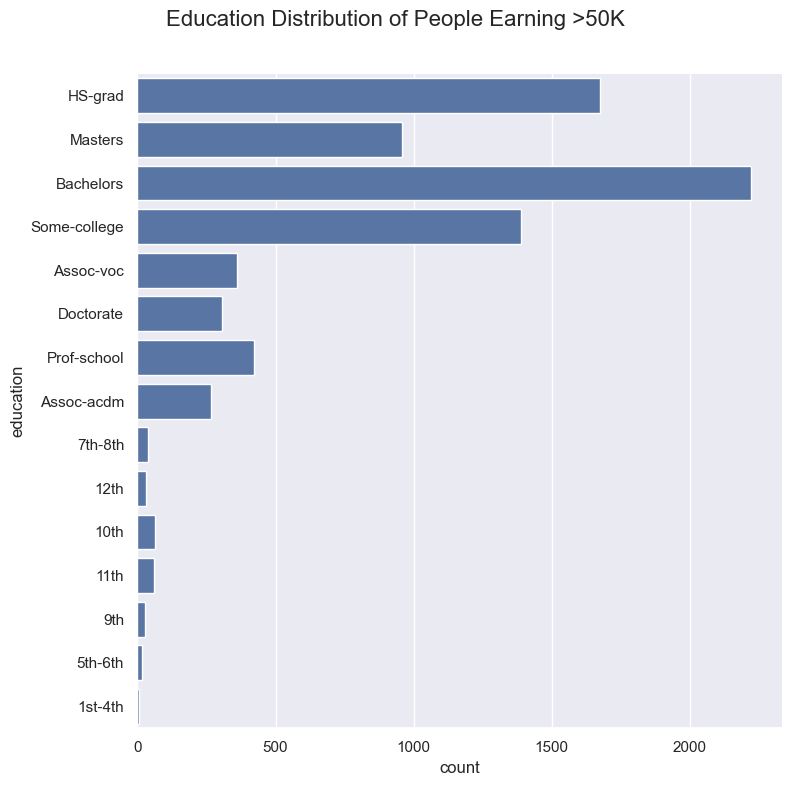

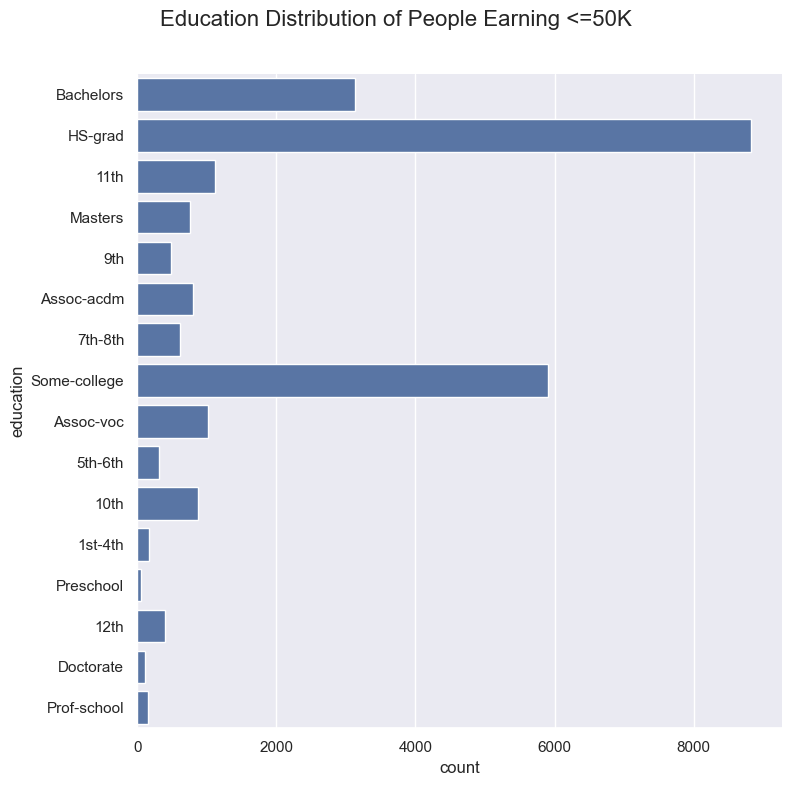

In [35]:
#answer
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

graph = sns.catplot(y = "education", data = data_above_50, kind = "count", height = 8)
graph.fig.suptitle("Education Distribution of People Earning >50K", fontsize=16)
graph.fig.subplots_adjust(top=0.9)

graph = sns.catplot(y = "education", data = data_less_50, kind = "count", height = 8)
graph.fig.suptitle("Education Distribution of People Earning <=50K", fontsize=16)
graph.fig.subplots_adjust(top=0.9)

- There is a clear correlation between higher education and higher income. Those earning more than 50K tend to have Bachelors or higher degrees (Masters, Doctorate), while those earning less are more concentrated in HS-grad and Some-college categories. 

- Higher education increases the likelihood of higher income, while lower education levels are more common among lower-income individuals.

**Question 6. Use *groupby()* and *describe()*. Find the race/s of the man with maximum age. ( 2 marks)**

In [41]:
#answer
males = data[data['sex'] == 'Male']
print(males.groupby('race')['age'].describe())
max_age = males['age'].max()
oldest_men = males[males['age'] == max_age]
print(oldest_men['race'].unique())

                      count       mean        std   min   25%   50%   75%  \
race                                                                        
Amer-Indian-Eskimo    192.0  37.208333  12.049563  17.0  28.0  35.0  45.0   
Asian-Pac-Islander    693.0  39.073593  12.883944  18.0  29.0  37.0  46.0   
Black                1569.0  37.682600  12.882612  17.0  27.0  36.0  46.0   
Other                 162.0  34.654321  11.355531  17.0  26.0  32.0  42.0   
White               19174.0  39.652498  13.436029  17.0  29.0  38.0  49.0   

                     max  
race                      
Amer-Indian-Eskimo  82.0  
Asian-Pac-Islander  90.0  
Black               90.0  
Other               77.0  
White               90.0  
['Black' 'White' 'Asian-Pac-Islander']


**Question 7. What is the maximum number of hours a person works per week (*hours-per-week* feature)? What is the percentage of people work maximum number of hour per week and who earn >50K? (2 marks)**

In [42]:
#answer
max_hours = data['hours-per-week'].max()
print(f"Maximum hours per week : {max_hours}")
data_max_hours = data[data['hours-per-week'] == max_hours]
data_max_hours_above_50 = data_max_hours[data_max_hours['salary'] == '>50K']
percentage = (len(data_max_hours_above_50) / len(data_max_hours)) * 100
print(f"Percentage of people : {percentage:.2f}%")

Maximum hours per week : 99
Percentage of people : 29.41%


**Question 8. Plot the histogram for all the numerical column. Comment on the data presented in the histogram. (2 marks)**

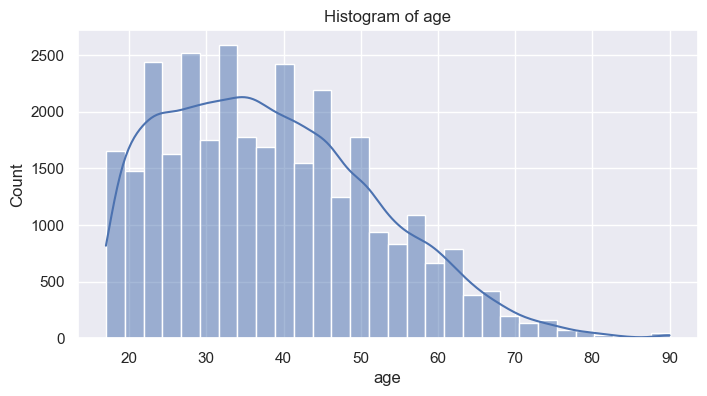

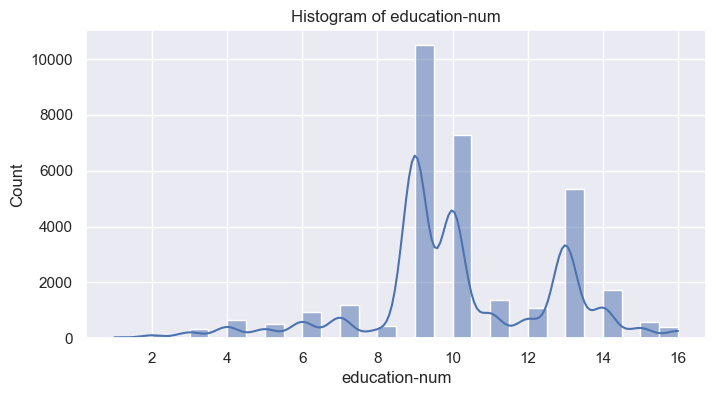

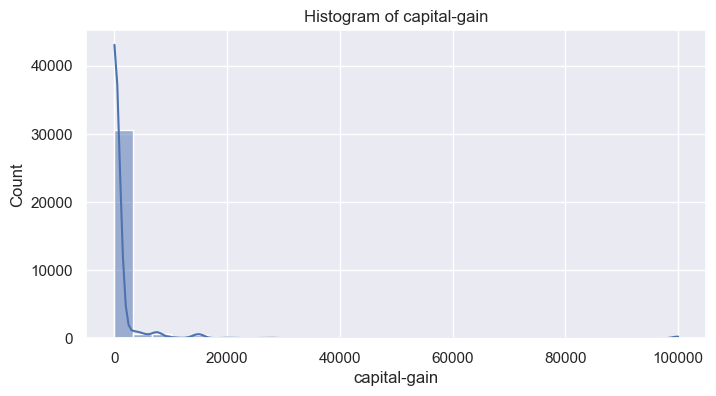

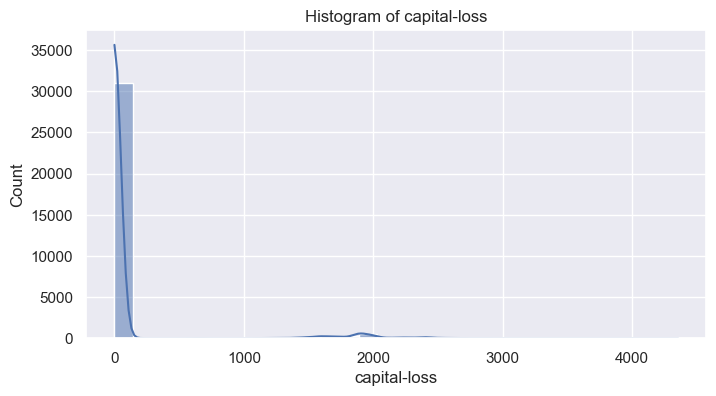

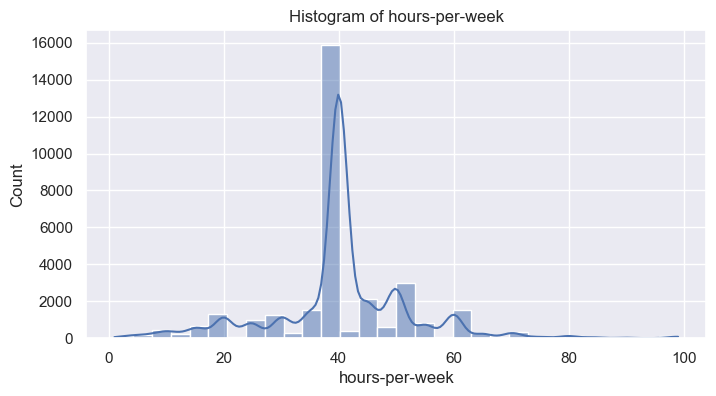

In [46]:
#answer
numerical_column = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
data_numerical = data[numerical_column]

for var in data_numerical:
    plt.figure(figsize=(8, 4))
    sns.histplot(data_numerical[var], bins=30, kde=True)
    plt.title(f"Histogram of {var}")
    plt.xlabel(var)
    plt.show()


**Question 9. Obtain the Skewness from the Question 8 histogram plot. Comment on the skewness. Suggest how to improve on it. (2 marks)**

In [48]:
#answer
skewness = data_numerical.skew()
print(f"Skewness of numerical features : \n{skewness}")

Skewness of numerical features : 
age                0.558743
education-num     -0.311676
capital-gain      11.953848
capital-loss       4.594629
hours-per-week     0.227643
dtype: float64


- capital-gain: Extremely positively skewed
- capital-loss: Heavily positively skewed
- age: Moderately right-skewed
- hours-per-week: Slight positive skew
- education-num: Slight left skew

For capital gain and capital loss, we can do log transformation

End of assignment